# Repeting tests until you get a positive result
In our experiment we will simply draw random numbers from identical distributions then compare the samples with a t-test. We will keep on repeating tests until we get a positive result. This test should give a false positive rate of 5% but we will see that by repeating tests we can actually get a much larger false positive rate.

In [1]:
import numpy as np                 # Numeric functions
from scipy.stats import ttest_ind  # T-test statistical test
import seaborn as sns              # plotting
import matplotlib.pyplot as plt    # more plotting

In [2]:
threshold_p = 0.05
n_tests = 10000
n_repeats = 20
control_groups = np.random.randn(n_repeats, n_tests)
pos_result = np.zeros((n_repeats, n_tests), dtype=np.bool)
treatment_groups = np.random.randn(n_repeats, n_tests)

In [3]:
for i in range(3,n_repeats+1):
    for j in range(n_tests):
        if pos_result[i-2,j]:
            pos_result[i-1,j] = True
        else:
            _, p = ttest_ind(control_groups[0:i,j],treatment_groups[0:i,j])
            pos_result[i-1,j] = p < threshold_p


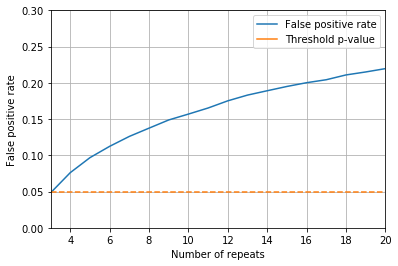

In [4]:
sns.lineplot(np.arange(n_repeats)[1:]+1, np.mean(pos_result,1)[1:], label='False positive rate')
ax = sns.lineplot([3,20], [0.05,0.05], label='Threshold p-value')
ax.lines[1].set_linestyle("--")
ax.set_ylim(0,0.3)
ax.set_xlim(3,20)
ax.set_xlabel('Number of repeats')
ax.set_ylabel('False positive rate')
ax.grid()
fig = plt.gcf()
fig.savefig('Repeating statistical tests.png', dpi = 600)

# What does this mean?
You can see that with this method, of repeating the measurment and statistically testing the result every time, we end up with a very high false positive rate. Clearly we must decide on the number of repeat tests to use in advance and only statistically test the result once.